In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import regex as re

In [2]:
#the data
df_raw = pd.read_csv('spotify52kData.csv')
print(df_raw.shape)
df_raw.head()

(52000, 20)


,songNumber,artists,album_name,track_name,popularity,duration,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
# Make getting column titles for starRating data headers
df_star_cols = df_raw['track_name']
df_star_cols = df_star_cols[:5000]

# Need to add indexes to tracks with same title - cant have a df with duplicate columns
mylist = list(df_star_cols)

m = map(lambda x: x[1]+ " " + str(mylist[:x[0]].count(x[1]) + 1) if mylist.count(x[1]) > 1 else x[1], enumerate(mylist))
m = list(m)
star_cols_clean = pd.Series(m)
star_cols_clean

0                             Comedy
1                 Ghost - Acoustic 1
2                     To Begin Again
3       Can't Help Falling In Love 1
4                          Hold On 1
                    ...             
4995                            Drop
4996           Kelly Watch the Stars
4997                        Passagio
4998                      Blue Seven
4999               Deep Sleep, Pt. 1
Length: 5000, dtype: object

In [4]:
df_star = pd.read_csv('starRatings.csv',header=None,names = star_cols_clean)
print(df_star.shape)
df_star.head()

(10000, 5000)


,Comedy,Ghost - Acoustic 1,To Begin Again,Can't Help Falling In Love 1,Hold On 1,Days I Will Remember 1,Say Something 1,I'm Yours 1,Lucky 1,Hunger,...,igloo,Finding A Way Past the Tears,Sol,"Theme From ""In Search Of Angels""",World Turns,Drop,Kelly Watch the Stars,Passagio,Blue Seven,"Deep Sleep, Pt. 1"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,1.0,NaN,NaN,3.0,NaN,NaN,NaN,0.0
3,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


CHECKLIST
Format: The project consist of your answers to 10 (equally-weighed, grade-wise) questions. Each answer
*must* include:
1. some text (describing both what you did and what you found, i.e. explicitly stating the answer to the question), 
2. a figure that illustrates the findings and 
3. some numbers (e.g. test statistics, confidence intervals, p-values or the like). 
Please save it as a pdf document. This document should be 5-7
pages long (arbitrary font size and margins). About ½ a page/question is reasonable. In addition, open
your document with 
4. a title page where you introduce your group (and group name), 
5. state author contributions as well as statements as to how you handled preprocessing (e.g. dimension reduction, data cleaning and data transformations), as this will apply to all answers.
6.  seed the random number generator with the N-number of one of your team members (specify which one)

### Question 4:  Which of the following 10 song features: duration, danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence and tempo predicts popularity best? How good is this model? 

In [5]:
#create train and test for your data
#do each single model one by one, as #5 implies we need to use the predictors separately
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, RobustScaler

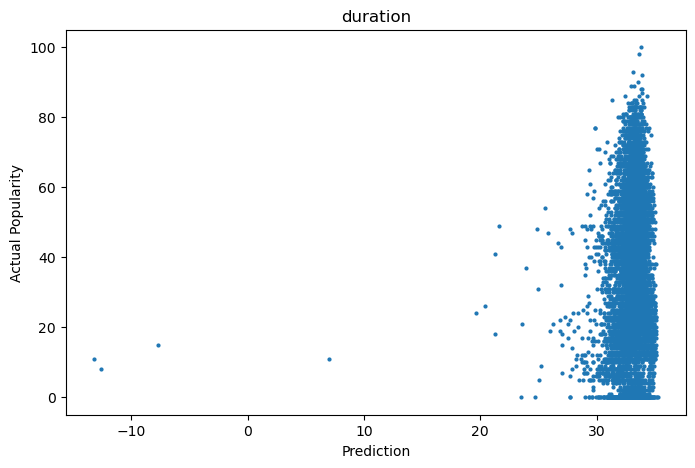

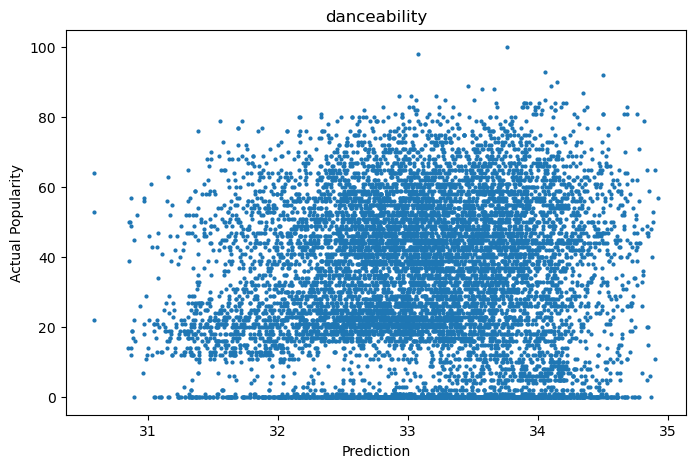

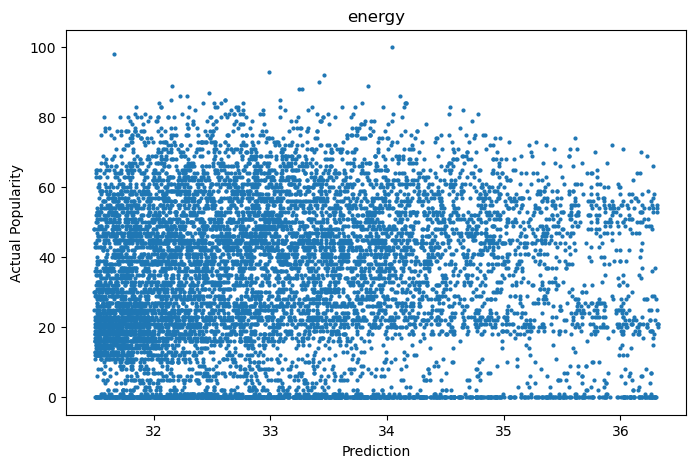

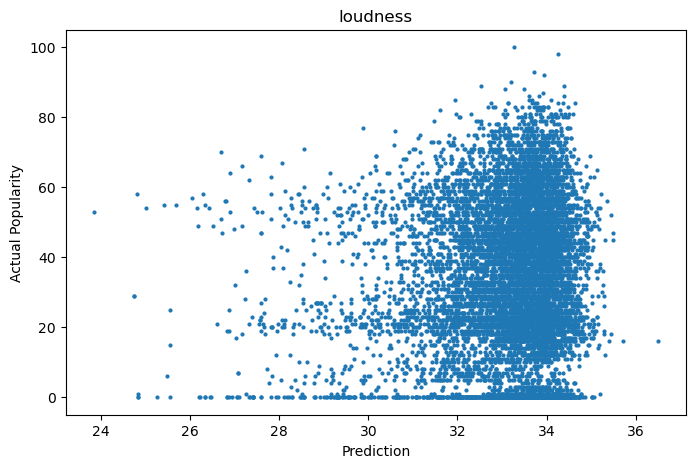

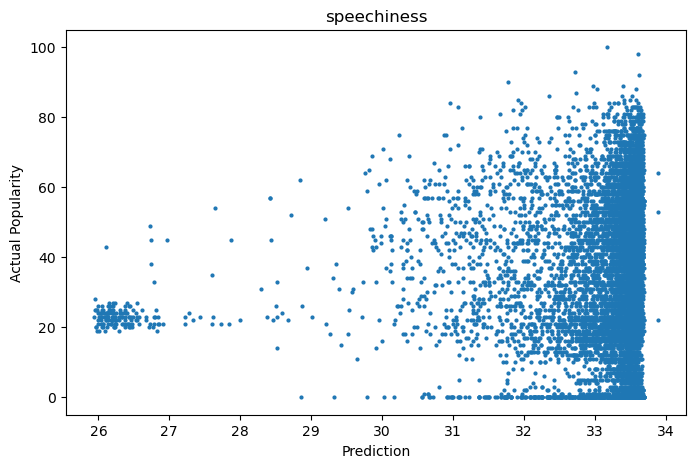

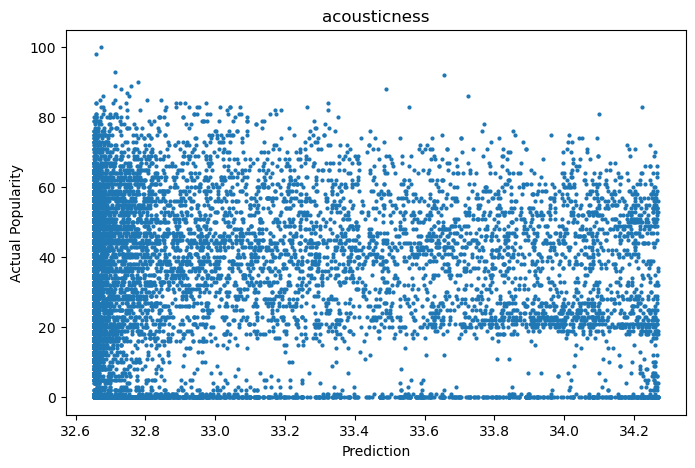

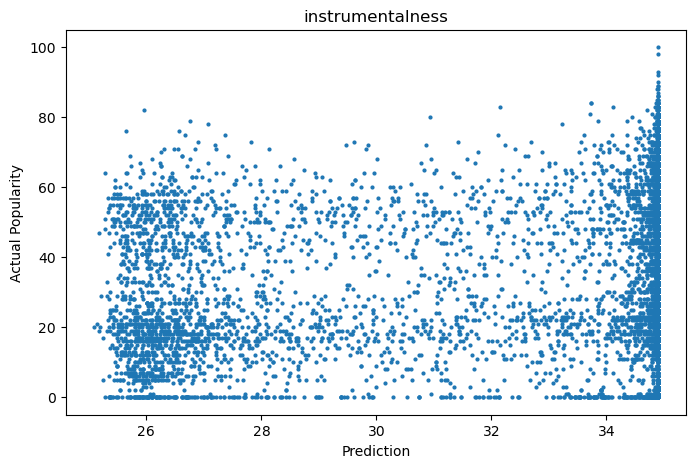

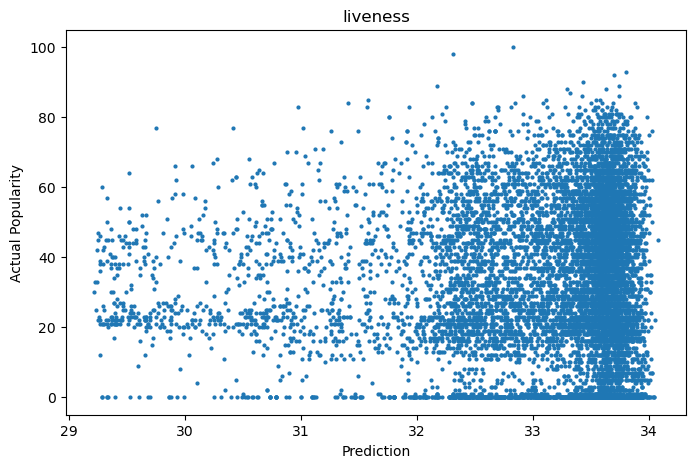

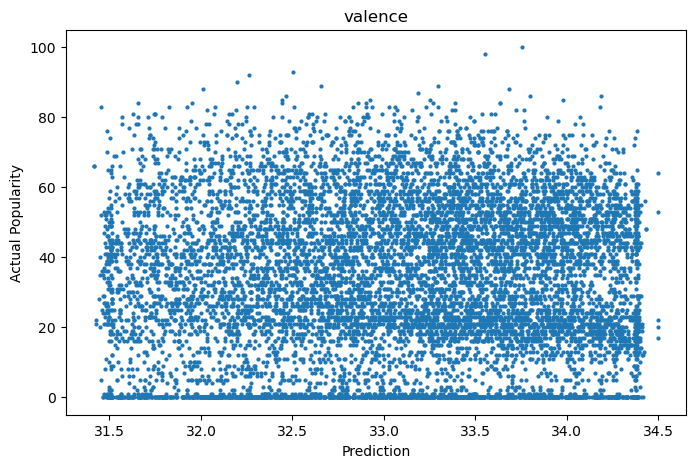

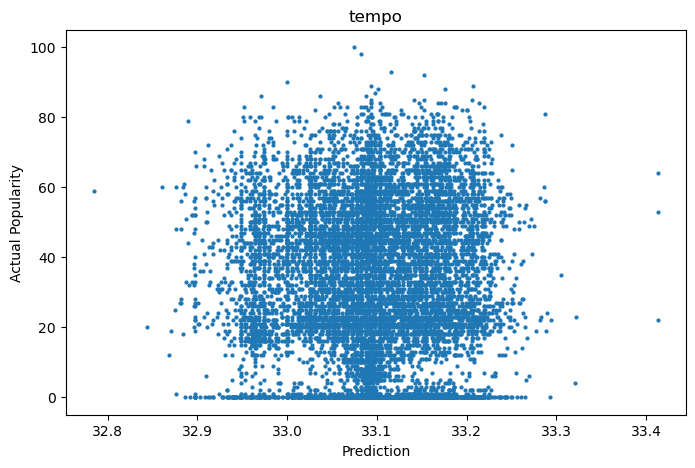

['duration', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
[0.0032, 0.0016, 0.0033, 0.0029, 0.0017, 0.0011, 0.0183, 0.0022, 0.0011, -0.0]
[21.725855273139803, 21.742806444498164, 21.72496818246734, 21.729490990372454, 21.74182716315049, 21.749016389927746, 21.56048906620617, 21.73655225518844, 21.749262110866347, 21.761163024102466]


In [6]:
#this code block uses code from lab 8: Model 1
#create data for this question

np.random.seed(10277396)
q4var = ["duration", "danceability", "energy", "loudness", "speechiness", 
            "acousticness", "instrumentalness", "liveness", "valence", "tempo","popularity"]
q4_data = df_raw[q4var]

# Check missing entries
# print("missing entries:",q4_data[q4_data.isna().any(axis=1)]) #no missing entries

#train/test 80/20 split
q4_train_x, q4_test_x, q4_train_y, q4_test_y = train_test_split(RobustScaler().fit_transform(df_raw[["duration", "danceability", "energy", "loudness", "speechiness", 
            "acousticness", "instrumentalness", "liveness", "valence", "tempo"]]),
    q4_data['popularity'],
    test_size=0.2) #random_state=10277396
# used standard scaler so maybe it will help with the poorly distributed data
# q4_train_x.shape, q4_test_x.shape, q4_test_x

r_sq = []
rmse = []

for i in range(10): #iterate through each predictor column
#     print(q4_train_x[:,i])
    q4_linreg = LinearRegression().fit(q4_train_x[:,i].reshape(-1,1),q4_train_y)
    q4_pred = q4_linreg.predict(q4_test_x[:,i].reshape(-1,1))
    
    plt.figure(figsize=(8,5))
    plt.plot(q4_pred, q4_test_y, 'o', ms=2)
    plt.xlabel('Prediction')
    plt.ylabel('Actual Popularity')
    plt.title(f'{q4var[i]}')
    plt.show()
    
    r_sq.append(r2_score(q4_test_y,q4_pred).round(4))
    rmse.append(np.sqrt(mean_squared_error(q4_test_y, q4_pred)))
#     rmse.append(np.sqrt(np.mean(np.sum((q4_test_y-q4_pred)**2))).round(4))


print(q4var[:-1])
print(r_sq)
print(rmse)

# ['duration', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
# [0.0032, 0.0016, 0.0033, 0.0029, 0.0017, 0.0011, 0.0183, 0.0022, 0.0011, -0.0]
# [21.725855273139803, 21.742806444498164, 21.72496818246734, 21.729490990372454, 21.74182716315049, 21.749016389927746, 21.56048906620617, 21.73655225518844, 21.749262110866347, 21.761163024102466]

Question 4:
Instrumentalness was the best predictor with an r^2 value of 0.0183 and rmse of 21.5605
This model is not good as the error is high and the variance explain is low.

Problem 5: Building a model that uses *all* of the song features mentioned in question 4, how well can you
predict popularity? How much (if at all) is this model improved compared to the model in question
4? How do you account for this? What happens if you regularize your model?

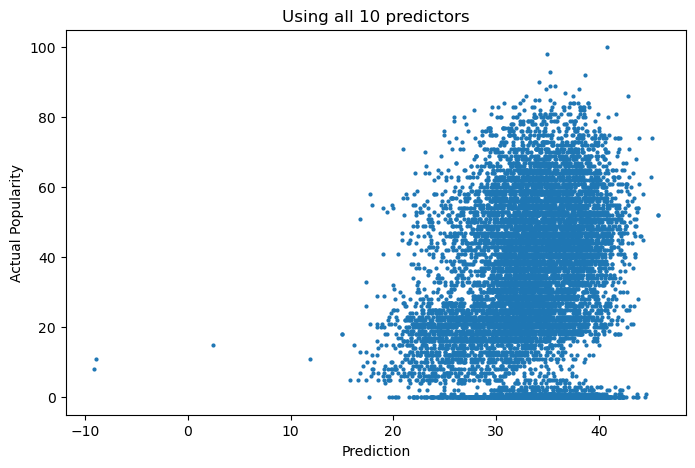

r^2: 0.0431
21.286607622941947


In [7]:
#Question 5
#similar to question 4 but no for loop
np.random.seed(10277396)
q4var = ["duration", "danceability", "energy", "loudness", "speechiness", 
            "acousticness", "instrumentalness", "liveness", "valence", "tempo","popularity"]
q4_data = df_raw[q4var]

#q4_train_x, q4_test_x, q4_train_y, q4_test_y 
q4_train_x, q4_test_x, q4_train_y, q4_test_y  = train_test_split(RobustScaler().fit_transform(df_raw[["duration", "danceability", "energy", "loudness", "speechiness", 
            "acousticness", "instrumentalness", "liveness", "valence", "tempo"]]),
    q4_data['popularity'],
    test_size=0.2)  #,random_state=10277396

q4_linreg = LinearRegression().fit(q4_train_x,q4_train_y)
q4_pred = q4_linreg.predict(q4_test_x)

plt.figure(figsize=(8,5))
plt.plot(q4_pred, q4_test_y, 'o', ms=2)
plt.xlabel('Prediction')
plt.ylabel('Actual Popularity')
plt.title('Using all 10 predictors')
plt.show()

# print(q4var[:-1])
print("r^2:",(r2_score(q4_test_y,q4_pred).round(4)))
print(np.sqrt(mean_squared_error(q4_test_y, q4_pred)))
# r^2: 0.0431
# 21.286607622941947

Automatically selected hyperparameter  0.006204017929620116
Betas [-0.73469584  1.17655835 -5.19314135  3.12996118 -0.42456597  0.36529393
 -1.50713001 -0.3986616  -3.37044092  0.29791721]
r^2: 0.0431
21.286592038898565


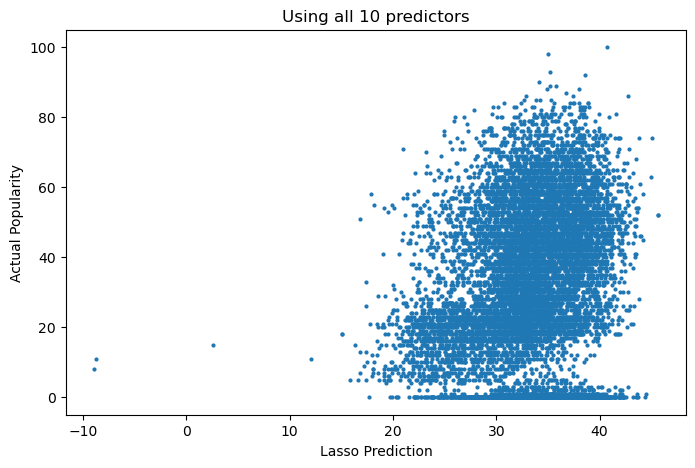

In [8]:
#Problem 5 Lasso regression
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_val_score
np.random.seed(10277396)

# alphas = np.logspace(-6, 4, 11)  # some alphas but we can try auto 


# referenced: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html
q4_lasso_cv = LassoCV(alphas=None, cv=5)  # using a combined cross valdiation plus lasso method
q4_lasso_cv.fit(q4_train_x, q4_train_y)
print("Automatically selected hyperparameter ", q4_lasso_cv.alpha_)
print("Betas",q4_lasso_cv.coef_)

q4_lasso_pred = q4_lasso_cv.predict(q4_test_x)
print("r^2:",(r2_score(q4_test_y,q4_lasso_pred).round(4)))
print(np.sqrt(mean_squared_error(q4_test_y, q4_lasso_pred)))

plt.figure(figsize=(8,5))
plt.plot(q4_lasso_pred, q4_test_y, 'o', ms=2)
plt.xlabel('Lasso Prediction')
plt.ylabel('Actual Popularity')
plt.title('Using all 10 predictors')
plt.show()

# Automatically selected hyperparameter  0.006204017929620116
# Betas [-0.73469584  1.17655835 -5.19314135  3.12996118 -0.42456597  0.36529393
#  -1.50713001 -0.3986616  -3.37044092  0.29791721]
# r^2: 0.0431
# 21.286592038898565

Q5: Even though I expected speechiness and instrumental to be inverses of each other, there was barely a change in r^2 value(0.0431 still) and RMSE(21.28661 to 21.28655). 

In [9]:
# Problem 6.1
# PCA class from lab 12
class PCA():
    """A method for doing dimensionality reduction by transforming the feature
    space to a lower dimensionality, removing correlation between features and
    maximizing the variance along each feature axis.
    """
    def _init__(self):
        self.eigenValues=None
        self.components=None
        
    def transform(self, X, n_components):
        """ Fit the dataset to the number of principal components specified in the
        constructor and return the transformed dataset """
        covariance_matrix = self.calculate_covariance_matrix(X)

        # Where (eigenvector[:,0] corresponds to eigenvalue[0])
        eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

        # Sort the eigenvalues and corresponding eigenvectors from largest
        # to smallest eigenvalue and select the first n_components
        idx = eigenvalues.argsort()[::-1] # [3, 2, 1] ---> [2, 1, 0] --> [0, 1, 2]
        eigenvalues = eigenvalues[idx][:n_components]
        eigenvectors = np.atleast_1d(eigenvectors[:, idx])[:, :n_components]
        
        # Set the object variables
        self.eigenValues=eigenvalues
        self.components=eigenvectors

        # Project the data onto principal components
        X_transformed = X.dot(eigenvectors)

        return X_transformed
    
    def calculate_covariance_matrix(self, X, Y=None):
        """ Calculate the covariance matrix for the dataset X """
        if Y is None:
            Y = X
        n_samples = np.shape(X)[0]
        covariance_matrix = (1 / (n_samples-1)) * (X - X.mean(axis=0)).T.dot(Y - Y.mean(axis=0))

        return np.array(covariance_matrix, dtype=float)

In [10]:
relevant_data = df_raw[['duration','danceability','energy','loudness','speechiness','acousticness',
                 'instrumentalness','liveness','valence','tempo','popularity']]
p6_X = relevant_data.iloc[:,:-1].values #Our X
p6_Y = relevant_data.iloc[:,-1].values #Our Y

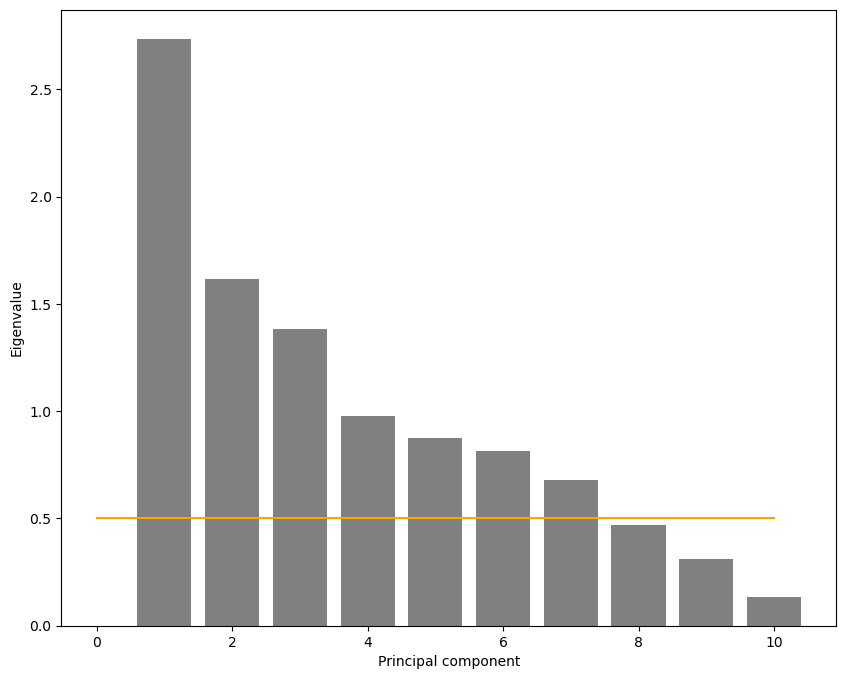

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.decomposition import PCA as sk_PCA
pca=PCA()
pca_pipeline = Pipeline([('scaling', StandardScaler()), ('pca', sk_PCA())])
pca_pipeline.fit(p6_X)
## Kaiser Criterion: Consider all principal components with eigen values greater than 1.0
eigVals=pca_pipeline[1].explained_variance_
nComponents = 10
x = np.linspace(1,nComponents, nComponents)
plt.figure(figsize=(10, 8))
plt.bar(x, eigVals, color='gray')
plt.plot([0,nComponents],[0.5,0.5],color='orange') # Orange Kaiser criterion line lowered to 0.5 or halved
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.show()
# end of 6.1, THIS 6.1 CHUNK IS ALL FROM LAB 12 USING THE APPROPRIATE PARAMETERS

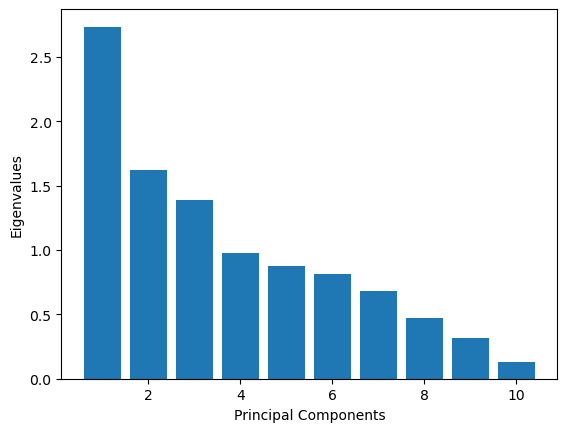

Proportion variance explained by the first 7 PCs: 0.90837


In [12]:
#from lab 11
numPredictors = np.size(p6_X,axis=1)
plt.bar(np.linspace(1,numPredictors,numPredictors),eigVals)
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.show()
print('Proportion variance explained by the first 7 PCs:',np.sum(eigVals[:7]/np.sum(eigVals)).round(5))

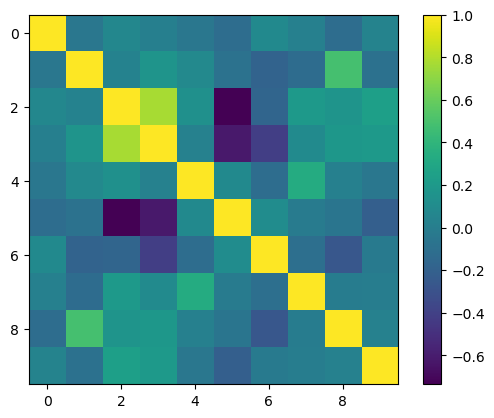

In [13]:
# from lab 11
# 3. Visualize correlation matrix
r = np.corrcoef(p6_X,rowvar=False)
plt.imshow(r) 
plt.colorbar()
plt.show()

#

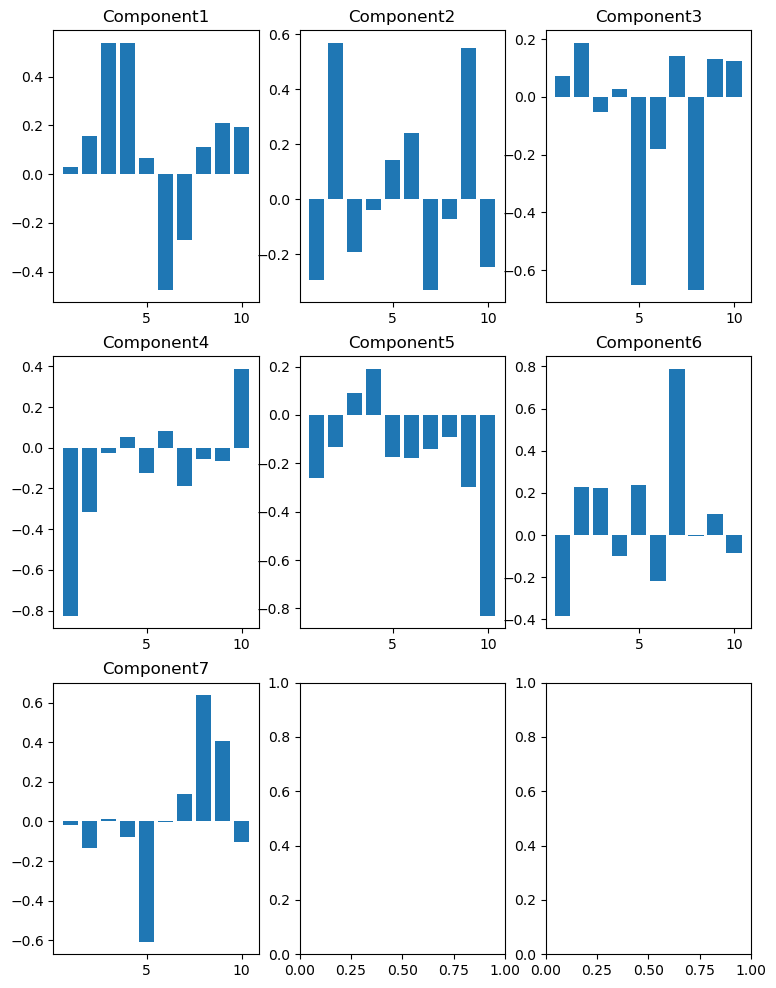

In [14]:
#from lab 11
from scipy import stats
from sklearn.decomposition import PCA
zscoredData = stats.zscore(p6_X)
pca = PCA().fit(zscoredData)
X_transformed=pca.transform(StandardScaler().fit_transform(p6_X))
loadings = pca.components_*-1

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (9,12))

# 6. Plot the loadings and interpret the principal components
plt.subplot(3,3,1) 
plt.bar(np.linspace(1,numPredictors,numPredictors),loadings[0,:]) 
plt.title('Component1')
plt.subplot(3,3,2) 
plt.bar(np.linspace(1,numPredictors,numPredictors),loadings[1,:]) 
plt.title('Component2')
plt.subplot(3,3,3) 
plt.bar(np.linspace(1,numPredictors,numPredictors),loadings[2,:]) 
plt.title('Component3')
plt.subplot(3,3,4) 
plt.bar(np.linspace(1,numPredictors,numPredictors),loadings[3,:]) 
plt.title('Component4')
plt.subplot(3,3,5) 
plt.bar(np.linspace(1,numPredictors,numPredictors),loadings[4,:]) 
plt.title('Component5')
plt.subplot(3,3,6) 
plt.bar(np.linspace(1,numPredictors,numPredictors),loadings[5,:]) 
plt.title('Component6')
plt.subplot(3,3,7) 
plt.bar(np.linspace(1,numPredictors,numPredictors),loadings[6,:]) 
plt.title('Component7')
plt.show()

predictors: 
1 duration, 2 danceability, 3 energy, 4 loudness, 5 speechiness,
6 acousticness, 7 instrumentalness, 8 liveness, 9 valence and 10 tempo

1)  Upbeatness
- HIGH+: energy,loudness, 
- HIGH-: acousticness, instrumentalness, 
- MEDIUM+: danceability,liveness,valence, and tempo

2) Sociality 
- HIGH+: Danceability,valence
- HIGH-: Duration, energy, tempo, instrumentalness 
- MEDIUM+: speechiness, acousticness
- LOW-: loudness, liveness

3) Official soundtracks
- No words, no acoustic, not live, 
- What's the exact opposite of live recordings???

4) catchiness
- very short songs, not danceable, tempo

5) Emotional
- slow songs, sad?

6) Electronic

7) Live recordings

In [15]:
#from lab 12 
"""
Bare Bones implementation of KMeans
"""
def KMeans(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(10277396)
    i = rng.permutation(X.shape[0])[:n_clusters]
#     print(i.shape)
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

In [16]:
#from lab 12
p6_pca_pipeline = Pipeline([('scaling', StandardScaler()), ('pca', sk_PCA(n_components=7))])
p6_processed = p6_pca_pipeline.fit_transform(p6_X)

In [17]:
#52k songs, Given that 1k songs per genre, should be around 52 clusters, but some genres are similar

In [18]:
# This is a test cell to see if I can cut down on computation time
# #from lab 12
# numClusters = 52 # how many clusters are we looping over? (from 2 to 10)
# Q = np.empty([numClusters,1])*np.NaN # init container to store sums

# from sklearn.cluster import KMeans as sk_KMeans
# from sklearn.metrics import silhouette_samples, silhouette_score
# # Compute kMeans:
# plt.figure(figsize=(16, 8))
# for ii in range(40, 52): # Loop through each cluster (from 2 to 10!)
#     kMeans = sk_KMeans(n_clusters = int(ii)).fit(p6_processed) # compute kmeans using scikit
#     cId = kMeans.labels_ # vector of cluster IDs that the row belongs to
#     cCoords = kMeans.cluster_centers_ # coordinate location for center of each cluster
#     s = silhouette_samples(p6_processed,cId) # compute the mean silhouette coefficient of all samples
#     Q[ii-2] = sum(s) # take the sum
#     # Plot data:
#     plt.subplot(3,4,ii-39) 
#     plt.hist(s,bins=40) 
#     plt.xlim(-0.2,1)
#     plt.ylim(0,250)
#     plt.xlabel('Silhouette score')
#     plt.ylabel('Count')
#     plt.title('Sum: {}'.format(int(Q[ii-2]))) # sum rounded to nearest integer
#     plt.tight_layout() # adjusts subplot padding

In [19]:
# plt.plot(np.linspace(1,52,52),Q)
# plt.xlabel('Number of clusters')
# plt.ylabel('Sum of silhouette scores')
# plt.show()

/Users/lucy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/0c/pl12gpjs6p5d_8ms8kj8gyh80000gn/T/ipykernel_1352/935994472.py:24: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout() # adjusts subplot padding
/Users/lucy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/0c/pl12gpjs6p5d_8ms8kj8gyh80000gn/T/ipykernel_1352/935994472.py:24: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommo

/var/folders/0c/pl12gpjs6p5d_8ms8kj8gyh80000gn/T/ipykernel_1352/935994472.py:24: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout() # adjusts subplot padding
/var/folders/0c/pl12gpjs6p5d_8ms8kj8gyh80000gn/T/ipykernel_1352/935994472.py:24: UserWarning: The figure layout has changed to tight
  plt.tight_layout() # adjusts subplot padding
/Users/lucy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/0c/pl12gpjs6p5d_8ms8kj8gyh80000gn/T/ipykernel_1352/935994472.py:24: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout() # adjusts subplot padding
/var/folders/0c/pl12gpjs6p5d_

/var/folders/0c/pl12gpjs6p5d_8ms8kj8gyh80000gn/T/ipykernel_1352/935994472.py:24: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout() # adjusts subplot padding
/var/folders/0c/pl12gpjs6p5d_8ms8kj8gyh80000gn/T/ipykernel_1352/935994472.py:24: UserWarning: The figure layout has changed to tight
  plt.tight_layout() # adjusts subplot padding
/Users/lucy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/0c/pl12gpjs6p5d_8ms8kj8gyh80000gn/T/ipykernel_1352/935994472.py:24: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout() # adjusts subplot padding
/var/folders/0c/pl12gpjs6p5d_

/var/folders/0c/pl12gpjs6p5d_8ms8kj8gyh80000gn/T/ipykernel_1352/935994472.py:24: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout() # adjusts subplot padding
/var/folders/0c/pl12gpjs6p5d_8ms8kj8gyh80000gn/T/ipykernel_1352/935994472.py:24: UserWarning: The figure layout has changed to tight
  plt.tight_layout() # adjusts subplot padding
/Users/lucy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/0c/pl12gpjs6p5d_8ms8kj8gyh80000gn/T/ipykernel_1352/935994472.py:24: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout() # adjusts subplot padding
/var/folders/0c/pl12gpjs6p5d_

/var/folders/0c/pl12gpjs6p5d_8ms8kj8gyh80000gn/T/ipykernel_1352/935994472.py:24: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout() # adjusts subplot padding
/var/folders/0c/pl12gpjs6p5d_8ms8kj8gyh80000gn/T/ipykernel_1352/935994472.py:24: UserWarning: The figure layout has changed to tight
  plt.tight_layout() # adjusts subplot padding
/Users/lucy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/0c/pl12gpjs6p5d_8ms8kj8gyh80000gn/T/ipykernel_1352/935994472.py:24: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout() # adjusts subplot padding
/var/folders/0c/pl12gpjs6p5d_

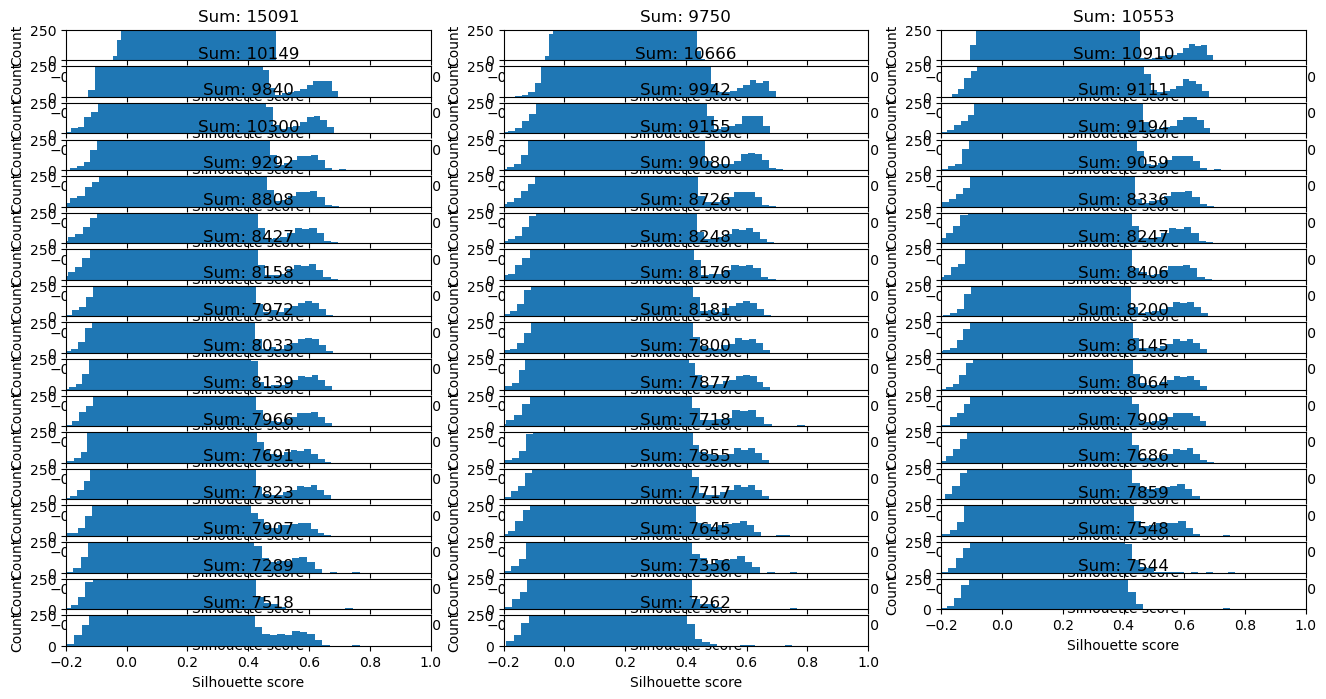

In [20]:
#from lab 12
#this takes like 20+ minutes to run
numClusters = 52 # how many clusters are we looping over? (from 2 to 10)
Q = np.empty([numClusters,1])*np.NaN # init container to store sums

from sklearn.cluster import KMeans as sk_KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
# Compute kMeans:
plt.figure(figsize=(16, 8))
for ii in range(2, 52): # Loop through each cluster
    kMeans = sk_KMeans(n_clusters = int(ii)).fit(p6_processed) # compute kmeans using scikit
    cId = kMeans.labels_ # vector of cluster IDs that the row belongs to
    cCoords = kMeans.cluster_centers_ # coordinate location for center of each cluster
    s = silhouette_samples(p6_processed,cId) # compute the mean silhouette coefficient of all samples
    Q[ii-2] = sum(s) # take the sum
    # Plot data:
    plt.subplot(17,3,ii-1)
    plt.hist(s,bins=40) 
    plt.xlim(-0.2,1)
    plt.ylim(0,250)
    plt.xlabel('Silhouette score')
    plt.ylabel('Count')
    plt.title('Sum: {}'.format(int(Q[ii-2]))) # sum rounded to nearest integer
    plt.tight_layout() # adjusts subplot padding

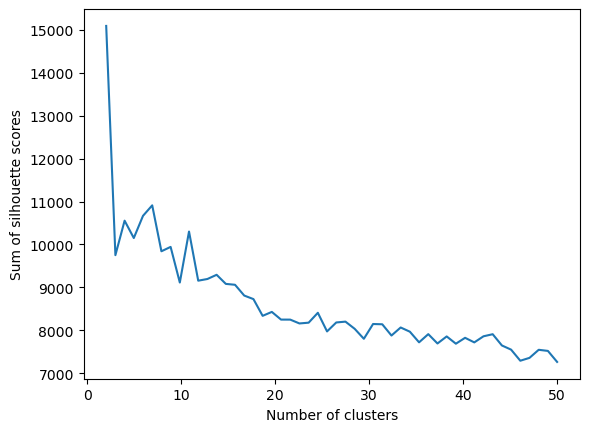

In [21]:
plt.plot(np.linspace(2,52,52),Q)
#I wanted to test for all clusters, but np.linspace forces me to have 52 points when there's only 51
plt.xlabel('Number of clusters')
plt.ylabel('Sum of silhouette scores')
plt.show()

6: 

- When considering the 10 song features in the previous question, how many meaningful principal components can you extract?
- 7, since we chose all the eigenvalues over 0.5. We could also go for all 10 to make it account for slightly more of the data.

- What proportion of the variance do these principal components account for?
- 90%

- Using these principal components, how many clusters can you identify? 
- 2

- Do these clusters reasonably correspond to the genre labels in column 20 of the data?
- No
~~

My guess is that if there's two clusters, it could be that there's "upbeat songs" versus "calming music", but definitely not 52 completely distinct categories of music. These categories are very poor identifiers.